In [ ]:
#OIBSIP Data Analytics
#Level2 taskno.:-1- Predicting House Prices with Linear Regression
#Intern name:-Sanjana Gidwani
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
file_path ='/content/Housing.csv'
data = pd.read_csv(file_path)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()
data.describe()
data['mainroad']=data['mainroad'].map({'yes':1,'no':0})
data['guestroom']=data['guestroom'].map({'yes':1,'no':0})
data['basement']=data['basement'].map({'yes':1,'no':0})
data['hotwaterheating']=data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning']=data['airconditioning'].map({'yes':1,'no':0})
data['prefarea']=data['prefarea'].map({'yes':1,'no':0})
data = pd.get_dummies(data,columns=['furnishingstatus'], drop_first=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


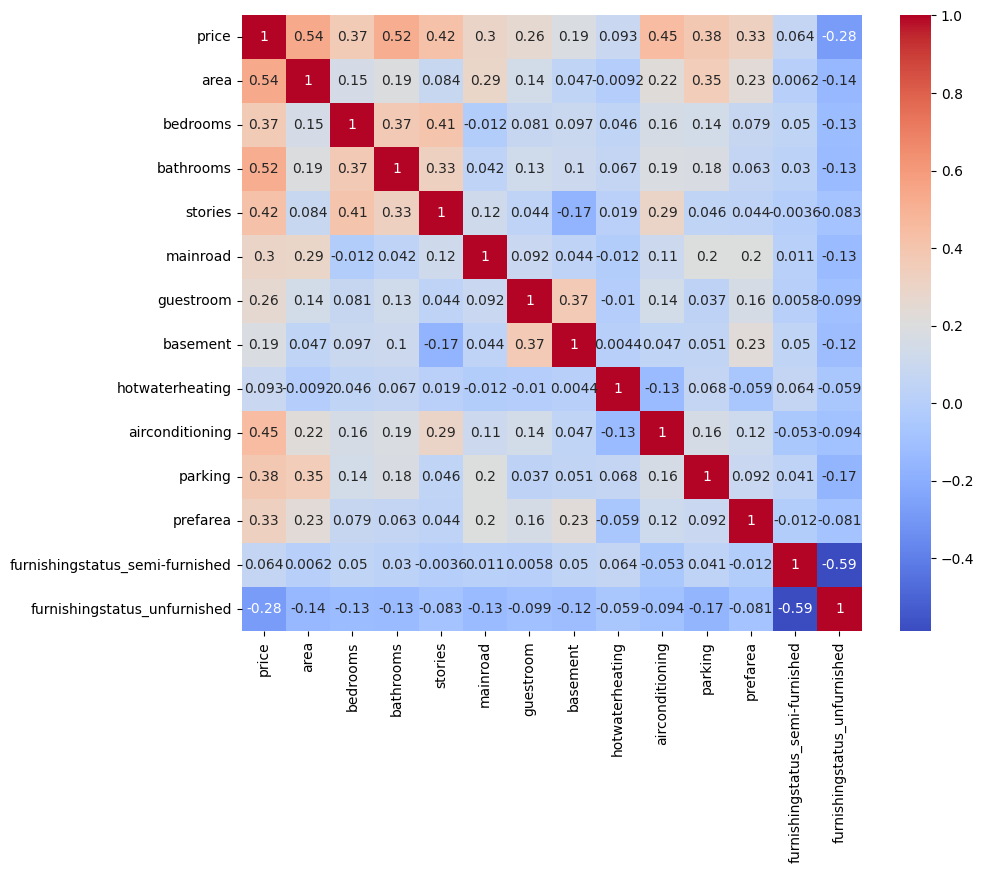

In [ ]:
X=data.drop('price',axis=1)
y=data['price']
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [ ]:
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Model coefficients:",model.coef_)
print("Model intercept:",model.intercept_)

Model coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Model intercept: 260032.35760741122


In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)

Mean Squared Error: 1754318687330.6633
Root Mean Squared Error: 1324506.9600914384
R-squared: 0.6529242642153185


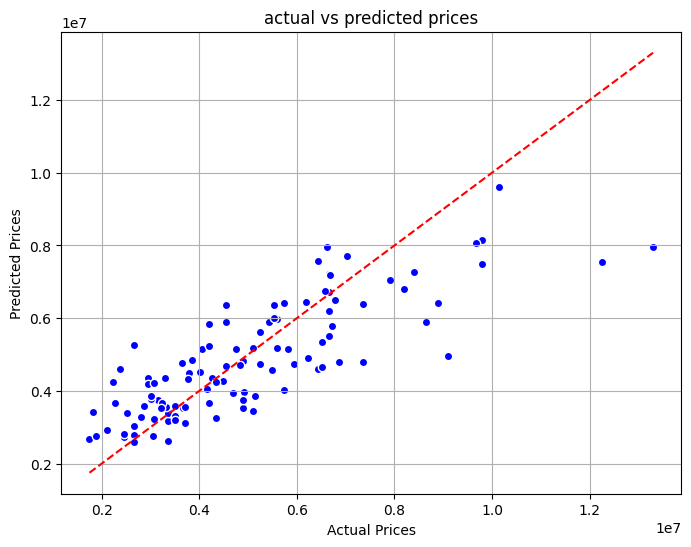

In [ ]:
#comparing actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',label='Actual vs Predicted',edgecolors='w')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--',label='Perfect Prediction')
plt.title('actual vs predicted prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
!pip install statsmodels

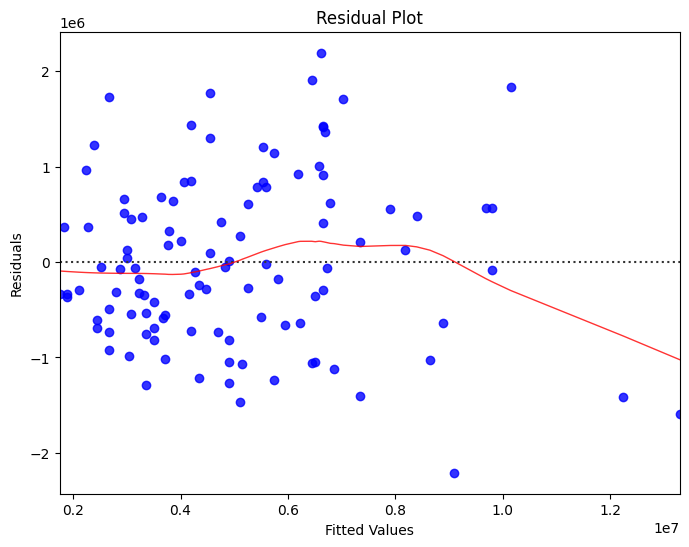

In [ ]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_test,y=y_pred,lowess=True,color='blue',line_kws={'color':'red','lw':1,'alpha':0.8})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()